# Introduction:

This notebook is intended to show of the major functions of the IntelliShield package. No files produced in this notebook will be saved.

Currently this model can be run on both Google Colab and Jupyter Notebook.If you want a more comprehensive way to explore the full functionality of the IntelliShield package try running the files in the 'scripts' folder.

## Jupyter Notebook:

The Jupyter Notebook will run the code locally. This is the best option if you plan to eventually use the full script functionality.

How to set up the Jupyter Notebook:
<ol>
 <li>Create a virtual environment to run the notebook in. The requirements can be found in the 'requirements.txt' file.</li>
 <li>Download the main.ipynb file.</li>
 <li>Download the IntelliShield Package.</li>
</ol>

## Google Colab:

Google Colab will run the code on the browser. This is the best option if you want to explore the use cases of the IntelliShield package or if you lack the space to locally host/store the notebook.

How to set up Google Colab:
<ol>
 <li>Open Google Colab and click 'Open Notebook'.</li>
 <li>Click the 'GitHub' line and type in 'austineamonn/SummerResearch2024'.</li>
 <li>Open the main.ipynb notebook.</li>
</ol>

This image shows the above steps.

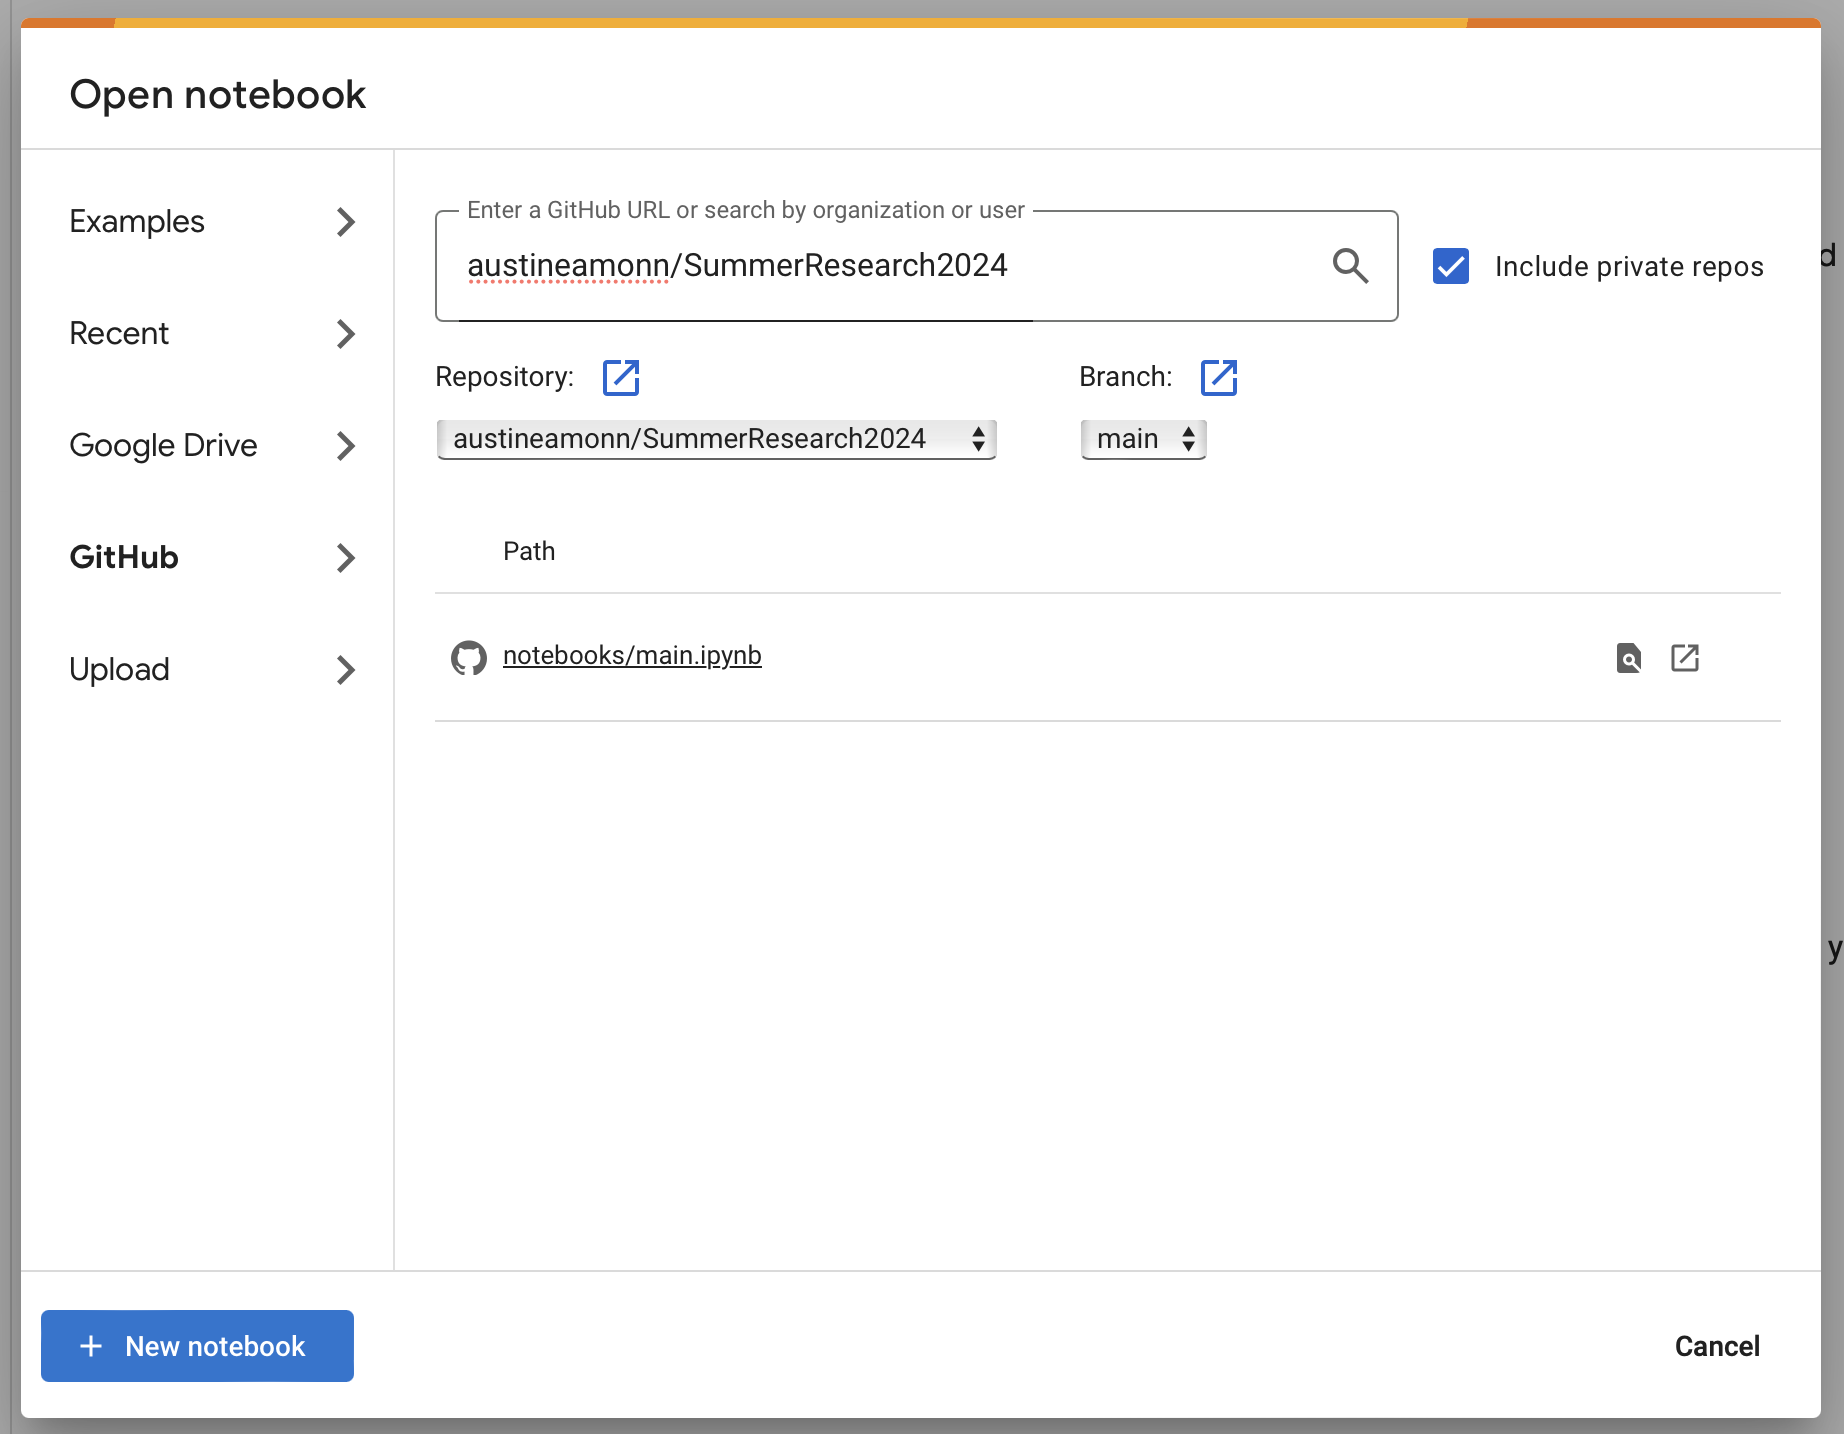

In [ ]:
# Only run this for Google Colab

!git clone 'https://github.com/austineamonn/SummerResearch2024'
%pip install shap

Before we begin we have some standard python libraries to import that we will use throughout this notebook.

In [7]:
import pandas as pd
import time

# Data Generation:

There was no existing dataset that contained the data needed for this project. Thus first we must generate a synthetic dataset. The dataset will be generated based on a variety of real data, mappings between datasets, and artificially generated lists.

***

First we import the Data class which contains all the data needed to generate the synthetic dataset.

Then we import the DataGenerator class for the CPU. Note that a version does exist that runs on the GPU.

The following code tries to import the functions. If you get the final error then the GitHub was not properly downloaded or cloned.

In [1]:
try: # Expected pathway for local Jupyter Notebook
    from IntelliShield.data_generation.data import Data
    from IntelliShield.data_generation.data_generation_CPU import DataGenerator
except ModuleNotFoundError:
    try: # Expected pathway for Google Colab
        from SummerResearch2024.src.IntelliShield.data_generation.data import Data
        from SummerResearch2024.src.IntelliShield.data_generation.data_generation_CPU import DataGenerator
    except ModuleNotFoundError: # Raise error as neither pathway works
        raise ModuleNotFoundError("You did not properly download or clone the repository.")

Next, we instantiate the Data and DataGenerator classes. The Data class allows us to access all the data needed to generate the synthetic dataset and the DataGenerator class allows us to use the functions needed to generate the synthetic dataset.

In [2]:
data = Data()
data_generator = DataGenerator(data)

What does the data look like? Some of the data is a list of values. Some lists were generated synthetically, others were pulled from various sources. More information can be found in the README file. Here is a list of learning styles:

In [3]:
data.learning_style()["learning_style_list"]

['Visual', 'Auditory', 'Read/Write', 'Kinesthetic']

Some of the data is a dictionary. Some dictionaries map different lists together while others map lists to demographic statistics on how common each item is. This dictionary maps the learning styles to the percentage of people that have said style.

In [4]:
data.learning_style()["learning_style"]

{'Visual': 27.27, 'Auditory': 23.56, 'Read/Write': 21.16, 'Kinesthetic': 28.01}

Now we use the generate_synthetic_dataset function to create a dataset from all the data. This function has two inputs:
- number of samples (an integer) which tell the function how many 'students' we want in our dataset
- batch size (an integer) which tells the function how to split up the work to prevent overloading the computer.
You can change the values if you want to generate more or less data. Be careful as higher values for number of samples will lead to a longer runtime.

In [5]:
num_samples = 100 # You can change these values if you want
batch_size = 10 # Batch size should be about 1/10 of the number of samples

Now we call the function. Use the time library to see how long the generator takes.

In [8]:
start_time = time.time()
synthetic_data = data_generator.generate_synthetic_dataset(num_samples, batch_size)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

15.461926221847534


'generate_synthetic_dataset' outputs a pandas dataframe. Let's examine the properties of the dataframe.

In [ ]:
synthetic_data.info(verbose=True, show_counts=True)

Lets look at the top 5 elements of the dataframe. You can look back at the README file to get a better sense of what each column contains and how it was generated.

In [ ]:
synthetic_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

Notice that we have columns that are lists and columns that are strings. Machine learning models need the input data to be numerical. Thus some data preprocessing is required.

# Data Preprocessing and Privatization:

We import the Preprocessing class to do the preprocessing work.

# Calculating Tradeoffs:

In [1]:
from IntelliShield.tradeoffs import ISDecisionTreeClassification

In [ ]:
# List of RNN models to run
RNN_model_list = ['GRU1', 'LSTM1', 'Simple1']

# List of Privatization Types to run
privatization_types = ['NoPrivatization', 'Basic_DP', 'Basic_DP_LLC', 'Uniform', 'Uniform_LLC', 'Shuffling', 'Complete_Shuffling']

# List of targets for the model 
targets = ['future topic 1', 'future topic 2', 'future topic 3', 'future topic 4', 'future topic 5']

# Get the runtime values for the function
profiler = cProfile.Profile()
profiler.enable()

for privatization_type in privatization_types:
    logging.info(f"Starting {privatization_type}")
    for RNN_model in RNN_model_list:
        logging.info(f"Starting {RNN_model}")

        # Data Path
        data_path = f'{data_folder}/{privatization_type}/{RNN_model}_alt_future_topics.csv'

        # Data
        data = pd.read_csv(data_path, converters={
            'learning style': literal_eval,
            'major': literal_eval,
            'previous courses': literal_eval,
            'course types': literal_eval,
            'course subjects': literal_eval,
            'subjects of interest': literal_eval,
            'extracurricular activities': literal_eval,
            'career aspirations': literal_eval,
            'future topics': literal_eval
        })

        for target in targets:
            logging.info(f"Starting {target}")

            target_name = target.replace(' ', '_')

            target_path = f'{output_path}/outputs/{privatization_type}/{RNN_model}/{target_name}'

            # Initiate regressifier
            regressifier = ISDecisionTreeRegressification(privatization_type, RNN_model, target, data=data, output_path=target_path)
            pipeline(regressifier, full_run=True)

In [ ]:
if isinstance(Model, ISDecisionTreeClassification) or isinstance(Model, ISDecisionTreeRegressification) or isinstance(Model, ISDecisionTreeRegression):
                get_best_model(Model)
            
# Run the main model
run_model(Model)

if isinstance(Model, ISDecisionTreeClassification) or isinstance(Model, ISDecisionTreeRegressification) or isinstance(Model, ISDecisionTreeRegression) or isinstance(Model, ISRandomForestClassification) or isinstance(Model, ISRandomForestRegressification) or isinstance(Model, ISRandomForestRegression):
    tree_plotter(Model, save_fig=True)

if isinstance(Model, ISDecisionTreeClassification) or isinstance(Model, ISDecisionTreeRegressification) or isinstance(Model, ISLogisticRegression) or isinstance(Model, ISLinearRegressification) or isinstance(Model, ISRandomForestClassification) or isinstance(Model, ISRandomForestRegressification):
    confusion_matrix_plotter(Model, save_fig=True)

if isinstance(Model, ISLinearRegression):
    linear_regression_plotter(Model)

# Get the SHAP values
calculate_shap_values(Model)
load_shap_values(Model, f'{Model.output_path}/shap_values.npy')
plot_shap_values(Model)

# Get feature importance
get_feature_importance(Model)

# Comparing Models: